In [1]:
# #ipython magic
# %reset -f
# %matplotlib inline
# %load_ext autoreload
# %autoreload 2

In [14]:
#general imports
import os
import sys 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(nb_dir)
sys.path.append(os.path.join(nb_dir, 'utils'))

In [15]:

sns.set()
sns.set_style('white')

#global plotting params
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [16]:
#notebook specific imports
import pickle
from utils_funcs import d_prime
#from utils import subsets_analysis as subs
from subsets_analysis import analyse_subsets, subset_attr

In [17]:
mouse_id = 'J048'
run_numbers = [19]

# mouse_id = 'RL048'
# run_numbers = [14]

In [18]:
subsets, run = analyse_subsets(mouse_id, run_numbers)

fifty_cells = subsets.subset_running_hit[-1]
#subsets.snip_session(start=1)
print(len(subsets.go_outcome))
subsets

134


27
16
16
12
14
49


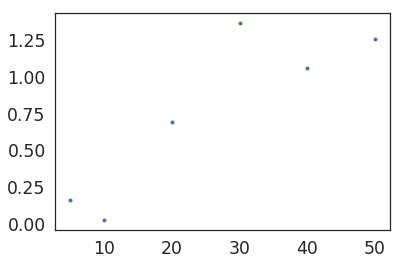

In [22]:
plt.plot(subsets.subsets, subsets.subsets_dprime, '.')



In [ ]:
plt.plot(subsets.subsets_dprime)

In [ ]:
subsets.nogo_outcome

In [ ]:
type(subsets.nogo_outcome)

In [ ]:
running_hit = []
running_fa = []

for outcome in run.outcome:
    if outcome == 'miss':
        running_hit.append(0)
    elif outcome == 'hit':
        running_hit.append(1)
    elif outcome == 'cr':
        running_fa.append(0)
    elif outcome == 'fp':
        running_fa.append(1)
        
        
N = 25
moving_hit = np.convolve(running_hit, np.ones((N,))/N, mode='valid')
moving_fa  = np.convolve(running_fa, np.ones((N,))/N, mode='valid')
    
running_dprime = []
i = 0
while True:
    if i == len(moving_hit)-1 or i==len(moving_fa)-1: break
    running_dprime.append(d_prime(moving_hit[i], moving_fa[i]))
    i = i+1
    
plt.plot(running_dprime)

In [ ]:
np.where(np.array(running_dprime) > 0.5)

x = 72/len(running_dprime)
136 * x

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(subsets, run7[0])
plt.xlabel('Number of Cells Targeted')
plt.ylabel('dprime')
sns.despine()
plt.savefig('/home/jamesrowland/Documents/Code/Vape/figures/J047_run7.png')

In [ ]:
# RL022_dprime = RL022.dprime_mouse([11,13,14])
# RL023_dprime = RL023.dprime_mouse([9,11,12])
# RL032_dprime = RL032.dprime_mouse([10,12,13])


# all_dprime = np.vstack((RL022_dprime, RL023_dprime, RL032_dprime)).squeez

# subset_sizes = RL022.subsets

In [ ]:
# mean_dprime = np.mean(all_dprime, 0)
# std_dprime = np.std(all_dprime, 0)
# sem_dprime = scipy.stats.sem(all_dprime, 0)

In [ ]:
# plt.figure()
# plt.errorbar(subset_sizes, mean_dprime,yerr=sem_dprime , fmt='.')

# sns.despine()
# plt.ylabel('d-prime')
# plt.xlabel('Number of Cells Targeted')
# plt.show()
# plt.savefig('/home/jamesrowland/Documents/Code/Vape/figures/all_mice_subsets.png')

In [ ]:
# running_fa = []

# good_runs = [11,13,14]
# arr_len = np.inf
# for run_number in good_runs:
#     res = RL023.running_fa(run_number)
    
#     if len(res) < arr_len:
#         arr_len = len(res)
#     running_fa.append(res)

    
# running_fa = [lst[0:arr_len] for lst in running_fa]

# running_fa = np.dstack(running_fa).squeeze()
running_fa = []

# good_runs = [11,13,14]
# arr_len = np.inf
# for run_number in good_runs:
#     res = RL023.running_fa(run_number)
    
#     if len(res) < arr_len:
#         arr_len = len(res)
#     running_fa.append(res)

    
# running_fa = [lst[0:arr_len] for lst in running_fa]

# running_fa = np.dstack(running_fa).squeeze()

# meaned = np.mean(running_fa,1)

# plt.plot(meaned[5:])
# meaned = np.mean(running_fa,1)

# plt.plot(meaned[5:])

In [ ]:
plt.plot(running_fa[5:])
plt.xlabel('trial_number')
plt.ylabel('false alarm rate')
sns.despine()